In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

In [2]:
train =pd.read_csv("G:/ml/digit recognizer/train.csv")
test = pd.read_csv("G:/ml/digit recognizer/test.csv")

In [3]:
images = train.iloc[:,1:]
labels=train.iloc[:,0]
train_images,test_images,train_labels,test_labels =train_test_split(images,labels,test_size =0.1,random_state =4)

Text(0.5,1,'8')

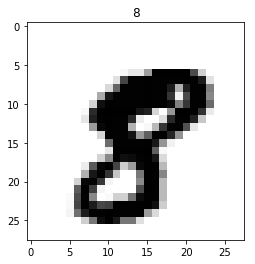

In [4]:
plt.imshow(train.iloc[10,1:].values.reshape(28,28),cmap ='binary')
plt.title(train.iloc[10,0])

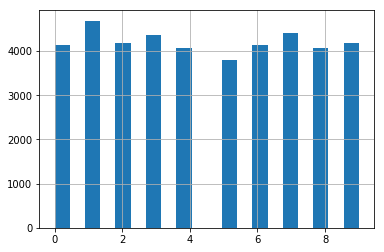

In [5]:
train['label'].hist(bins =20)

C:\Users\Ayush\Anaconda3\envs\tfp3.6\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


(array([ 566.,   17.,   12.,   11.,    3.,    9.,    9.,   11.,    7.,  139.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

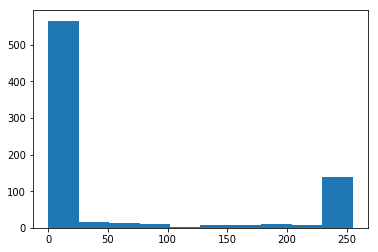

In [6]:
plt.hist(train.ix[:,1:].iloc[1])

In [7]:
from sklearn.ensemble import RandomForestClassifier
print(train_images.shape)
print(test_images.shape)

(37800, 784)
(4200, 784)


In [15]:
clf =RandomForestClassifier(n_estimators =200)
clf.fit(train_images,train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
print(clf.score(train_images,train_labels))
print(clf.score(test_images,test_labels))

1.0
0.963095238095


In [10]:
submission =pd.DataFrame()
submission['Label'] =clf.predict(test)
submission.index+=1
submission.index.name ='ImageId'

Text(0.5,1,'0')

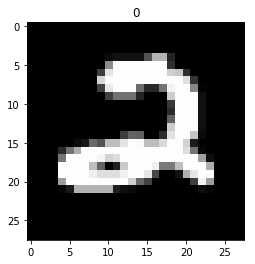

In [11]:
plt.imshow(test.iloc[0,:].values.reshape(28,28), cmap ="gray")
plt.title(test.iloc[0,0])

In [17]:
submission.to_csv("G:/ml/digit recognizer/result.csv")